# Intro

Enter your query q in Headers & Parameters section then run all.

if you do too many searches at one your ip can be flagged by a bot ([stackoverflow](https://stackoverflow.com/questions/60707415/problems-in-retrieving-google-scholar-results-with-beautifulsoup))

In [ ]:
# pip install requests
# pip install lxml 
# pip install beautifulsoup4
# pip install google-search-results 

# Import Libraries

In [96]:
from bs4 import BeautifulSoup
import requests, lxml, os, json
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Headers & Parameters

In [97]:
headers = {
    'User-agent':
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
}

params = {
  "q": "deep learning",
  "hl": "en",
}

html = requests.get('https://scholar.google.com/scholar?start=0', headers=headers, params=params).text
soup = BeautifulSoup(html, 'lxml')

# Web Scraping

We find out how many search results there are and we get the number pages we could cycle through.

In [98]:
def pagination(s):
  txt = ""
  for result in s.select('.gs_ab_mdw'):
    txt = ''.join(result.text)
  print(txt)
  x = re.search("(\d+,\d+)", txt)
  x = x[0]
  x = x.replace(',', '')
  x = int(x)
  y = x / 10
  return y
pages = pagination(soup)

TypeError: ignored

## Scrape just PDF links

In [99]:
# Scrape just PDF links
for pdf_link in soup.select('.gs_or_ggsm a'):
  pdf_file_link = pdf_link['href']
  print(pdf_file_link)

In [100]:
# JSON data will be collected here
data = []
text = ""
if pages > 10: 
  z = 11 
else:
  z = pages

for i in range(z):
  url ="https://scholar.google.com/scholar?start="
  url += str(i*10)
  #print(url)
  html = requests.get(url, headers=headers, params=params).text
  soup = BeautifulSoup(html, 'lxml')
  # Container where all needed data is located
  for result in soup.select('.gs_ri'):
    title = result.select_one('.gs_rt').text
    title_link = result.select_one('.gs_rt a')['href']
    publication_info = result.select_one('.gs_a').text
    snippet = result.select_one('.gs_rs').text
    cited_by = result.select_one("a[href*=/scholar?cites=]").text #result.select_one('#gs_res_ccl_mid .gs_nph a')['href']
    related_articles = result.select_one("a[href*=/scholar?q=related=]") #result.select_one('a:nth-child(4)')['href'] 
    try:
      all_article_versions = result.select_one('a~ a+ .gs_nph')['href']
    except:
      all_article_versions = None

    data.append({
      'title': title,
      'title_link': title_link,
      'publication_info': publication_info,
      'snippet': snippet,
      'cited_by': f'https://scholar.google.com{cited_by}',
      'related_articles': f'https://scholar.google.com{related_articles}',
      'all_article_versions': f'https://scholar.google.com{all_article_versions}',
    })
    text += " " + title
    #print(text)

#print(json.dumps(data, indent = 2, ensure_ascii = False))
print(text)

# Wordcloud

## Tokenise the words

In [101]:
tokens = []

tokens = word_tokenize(text)

print('Number of Tokens =',len(tokens))

Number of Tokens = 0


## Filter words, remove numbers & Punctuation

In [102]:
#converts to lower case, and removes punctuation and numbers
wordsFiltered = [tokens.lower() for tokens in tokens if tokens.isalpha()]
print(len(wordsFiltered))
print(wordsFiltered)

0
[]


## Stopword setup

In [82]:
#We initialize the stopwords variable which is a list of words like 
#"The", "I", "and", etc. that don't hold much value as keywords
stop_words = stopwords.words('english')
print(stop_words)

#some extra stop words are needed after examining the data and word cloud
#these are added
extra_stop_words = ['pdf']
stop_words.extend(extra_stop_words)
print(stop_words)

# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(len(filtered_words))
print(filtered_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## word frequency counts

In [83]:
#get the frequency of each word
from collections import Counter

# count frequencies
cnt = Counter()
for word in filtered_words:
  cnt[word] += 1

print(cnt)

Counter({'fraud': 111, 'credit': 107, 'card': 107, 'detection': 94, 'pdf': 46, 'using': 33, 'learning': 22, 'data': 12, 'neural': 12, 'machine': 12, 'based': 12, 'mining': 10, 'techniques': 10, 'detecting': 10, 'analysis': 9, 'model': 7, 'novel': 7, 'system': 7, 'methods': 6, 'network': 6, 'algorithm': 6, 'approach': 6, 'html': 6, 'application': 5, 'classification': 5, 'deep': 5, 'survey': 5, 'ensemble': 5, 'networks': 4, 'strategy': 4, 'transaction': 4, 'artificial': 4, 'comparative': 3, 'study': 3, 'review': 3, 'perspective': 3, 'prevention': 3, 'aggregation': 3, 'technique': 3, 'supervised': 3, 'algorithms': 3, 'approaches': 3, 'genetic': 3, 'immune': 3, 'systems': 3, 'hybrid': 3, 'hidden': 2, 'markov': 2, 'models': 2, 'bayesian': 2, 'feature': 2, 'engineering': 2, 'strategies': 2, 'random': 2, 'forest': 2, 'transactions': 2, 'oriented': 2, 'unsupervised': 2, 'decision': 2, 'support': 2, 'vector': 2, 'machines': 2, 'ann': 2, 'adversarial': 2, 'improving': 2, 'results': 2, 'classifie

## WordCloud image

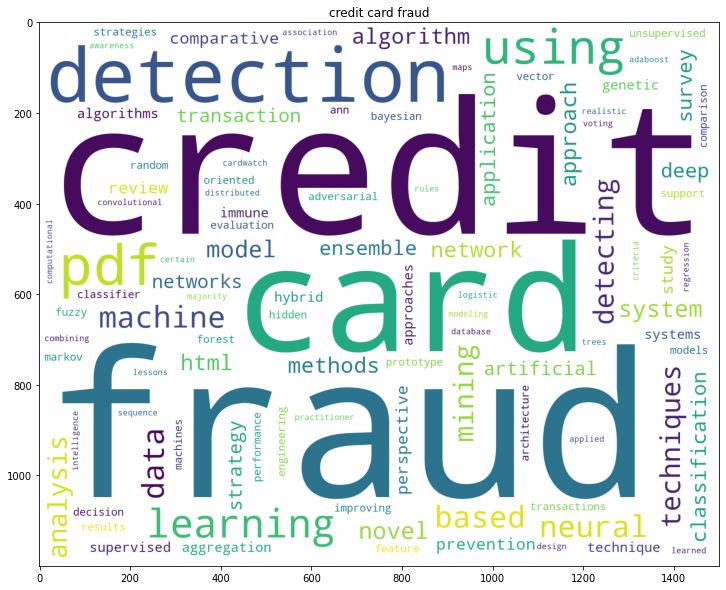

In [84]:
#create a word cloud using frequencies for emphasis 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=100, margin=9, background_color='white',
scale=3, relative_scaling = 0.5, width=500, height=400,
random_state=1).generate_from_frequencies(cnt)

plt.figure(figsize=(20,10))
plt.title(params['q'])
plt.imshow(wc)
#plt.axis("off")
plt.show()

#Save the image in the img folder:
#wc.to_file(wkDir+party+"_2016.png")